# WeatherPy

---

Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 640


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
       

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City '" + city.title() +" 'not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ati
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | illoqqortoormiut
City 'Illoqqortoormiut 'not found. Skipping...
Processing Record 5 of Set 1 | cidreira
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | krosno
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | qaanaaq
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kidal
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | bonavista
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | avera
Processing Record 23 o

City 'Burica 'not found. Skipping...
Processing Record 40 of Set 4 | avarua
Processing Record 41 of Set 4 | enderby
Processing Record 42 of Set 4 | sao filipe
Processing Record 43 of Set 4 | te anau
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | castro
Processing Record 46 of Set 4 | palabuhanratu
City 'Palabuhanratu 'not found. Skipping...
Processing Record 47 of Set 4 | colares
Processing Record 48 of Set 4 | port elizabeth
Processing Record 49 of Set 4 | inuvik
Processing Record 0 of Set 5 | cuzdrioara
Processing Record 1 of Set 5 | umm kaddadah
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | athabasca
Processing Record 4 of Set 5 | strelka
Processing Record 5 of Set 5 | gulshat
City 'Gulshat 'not found. Skipping...
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | atar
Processing Record 8 of Set 5 | ostrovnoy
Processing Record 9 of Set 5 | semporna
Processing Record 10 of Set 5 | xai-xai
Processing Re

Processing Record 26 of Set 8 | padang
Processing Record 27 of Set 8 | dunedin
Processing Record 28 of Set 8 | mayo
Processing Record 29 of Set 8 | bondoukou
Processing Record 30 of Set 8 | kalabo
Processing Record 31 of Set 8 | pamanukan
Processing Record 32 of Set 8 | samarai
Processing Record 33 of Set 8 | tevriz
Processing Record 34 of Set 8 | evensk
Processing Record 35 of Set 8 | trinidad
Processing Record 36 of Set 8 | bud
Processing Record 37 of Set 8 | talaya
Processing Record 38 of Set 8 | hokitika
Processing Record 39 of Set 8 | truth or consequences
Processing Record 40 of Set 8 | tamandare
Processing Record 41 of Set 8 | mana
Processing Record 42 of Set 8 | labrea
Processing Record 43 of Set 8 | toliary
City 'Toliary 'not found. Skipping...
Processing Record 44 of Set 8 | berbera
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | ivanava
Processing Record 47 of Set 8 | gazanjyk
Processing Record 48 of Set 8 | changji
Processing Record 49 of Set 8 | ito
P

Processing Record 9 of Set 12 | klyuchi
Processing Record 10 of Set 12 | southampton
Processing Record 11 of Set 12 | greenville
Processing Record 12 of Set 12 | kuche
City 'Kuche 'not found. Skipping...
Processing Record 13 of Set 12 | aflu
City 'Aflu 'not found. Skipping...
Processing Record 14 of Set 12 | teya
Processing Record 15 of Set 12 | san patricio
Processing Record 16 of Set 12 | puerto carreno
Processing Record 17 of Set 12 | sorvag
City 'Sorvag 'not found. Skipping...
Processing Record 18 of Set 12 | banda aceh
Processing Record 19 of Set 12 | aykhal
Processing Record 20 of Set 12 | san martin
Processing Record 21 of Set 12 | bajil
Processing Record 22 of Set 12 | clyde river
Processing Record 23 of Set 12 | tatarskaya pishlya
Processing Record 24 of Set 12 | tromso
Processing Record 25 of Set 12 | karkaralinsk
City 'Karkaralinsk 'not found. Skipping...
Processing Record 26 of Set 12 | katobu
Processing Record 27 of Set 12 | rawannawi
City 'Rawannawi 'not found. Skipping..

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [5]:
# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
368,Berbera,10.4396,45.0143,29.96,70,27,5.54,SO,1681038359
73,Chuy,-33.6971,-53.4616,17.74,81,0,1.10,UY,1681038294
469,Spisska Nova Ves,48.9446,20.5615,9.39,68,91,1.16,SK,1681038231
265,Hirara,24.8000,125.2833,19.15,59,20,4.63,JP,1681038341
459,Olot,42.1810,2.4901,19.74,42,100,0.89,ES,1681038389
554,Porbandar,21.6422,69.6093,30.00,45,37,7.99,IN,1681038411
338,Guerrero Negro,27.9769,-114.0611,13.09,93,13,4.52,MX,1681038354
254,Krasnyy,54.5678,31.4333,14.57,50,42,1.12,RU,1681038339
438,Brokopondo,4.7500,-55.1667,24.54,82,71,1.90,SR,1681038381
157,Zhigalovo,54.8097,105.1578,-2.52,66,100,1.84,RU,1681038314


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
321,Petropavlovka,50.6114,105.3196,-1.67,71,100,3.22,RU,1681038351
443,Barsovo,61.1667,73.1667,-2.93,99,100,6.30,RU,1681038385
90,Horsham,51.0640,-0.3272,16.01,76,20,3.09,GB,1681038297
4,Kapaa,22.0752,-159.3190,23.18,85,75,6.69,US,1681038282
293,Adwa,14.1646,38.8955,30.55,18,13,3.70,ET,1681038346
537,Mamaku,-38.1000,176.0833,15.78,99,100,3.10,NZ,1681038407
180,Enderby,52.5878,-1.2062,13.65,71,73,5.39,GB,1681038320
140,Kloulklubed,7.0419,134.2556,25.28,79,100,2.50,PW,1681038309
540,Mwinilunga,-11.7358,24.4293,22.01,79,100,2.24,ZM,1681038408


In [8]:
# Set Time to inlcuded on Graphs
today = time.time()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

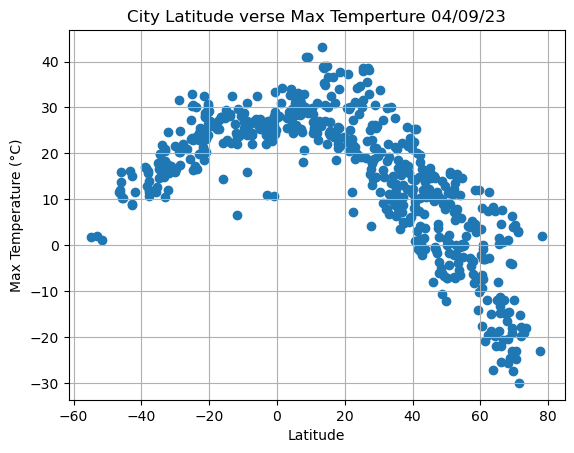

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude verse Max Temperture " + time.strftime("%x"))
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

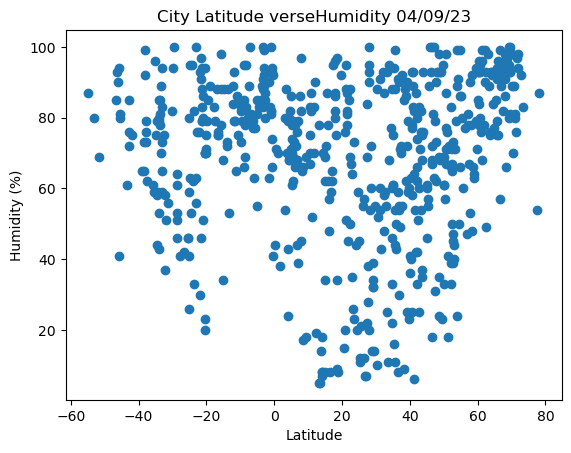

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude verseHumidity " + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

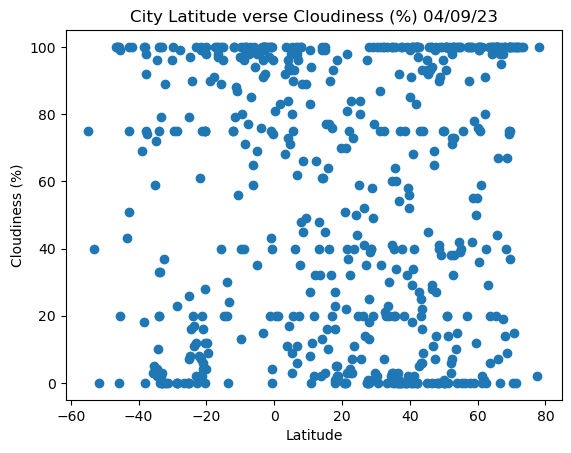

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude verse Cloudiness (%) "  + time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

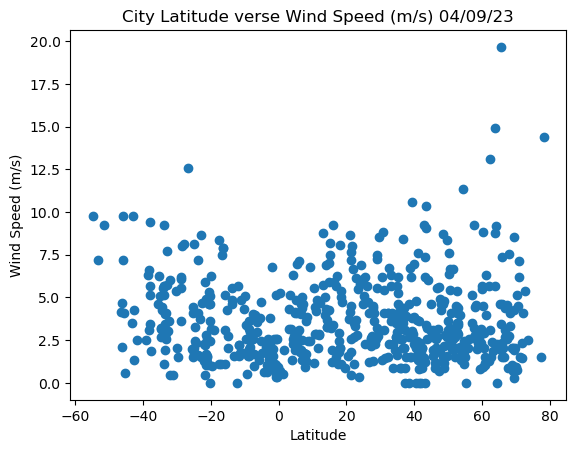

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude verse Wind Speed (m/s) "  + time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, location):
    # Regression caluculation
    (slope, intercept, rvalue, pvalue, srderr) = linregress(x_values, y_values)
    
    # Linean Regression line calucation
    regress_values = (slope * x_values) + intercept
    line_eq = f"y = {round(slope ,2)}x +{round(intercept ,2)}"
    print(f" The rvalue is: {round((rvalue **2),5)}")
    
    
    # create plots

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
   
    # Show equation on scatter plot
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere - Linear Regression of {y_label} verse {x_label} "  + time.strftime("%x"))
    plt.annotate(line_eq, location, color="red")

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.sample(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
86,Vanderhoof,54.0166,-124.0198,-0.40,99,100,1.78,CA,1681038296
254,Krasnyy,54.5678,31.4333,14.57,50,42,1.12,RU,1681038339
96,Victoria,22.2855,114.1577,21.78,69,32,3.48,HK,1681038037
317,Vila Franca Do Campo,37.7167,-25.4333,16.23,92,100,3.92,PT,1681038350
466,Arvi,20.9833,78.2333,37.27,20,51,4.15,IN,1681038391
200,Pevek,69.7008,170.3133,-27.35,100,100,0.94,RU,1681038324
539,Faya,18.3851,42.4509,23.29,34,2,5.38,SA,1681038408
515,Altay,47.8667,88.1167,1.87,62,14,4.25,CN,1681038402
530,Tatarskaya Pishlya,54.0608,44.8998,11.04,24,0,1.88,RU,1681038406


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
363,Hokitika,-42.7167,170.9667,15.02,85,100,4.27,NZ,1681038358
304,Carnarvon,-24.8667,113.6333,22.94,63,8,8.10,AU,1681038348
117,Airai,-8.9266,125.4092,15.92,95,100,1.55,TL,1681038302
365,Tamandare,-8.7597,-35.1047,27.02,78,98,1.98,BR,1681038358
184,Castro,-24.7911,-50.0119,16.33,95,97,3.28,BR,1681038321
193,Bredasdorp,-34.5322,20.0403,19.89,44,4,4.46,ZA,1681038323
537,Mamaku,-38.1000,176.0833,15.78,99,100,3.10,NZ,1681038407
162,Sydney,-33.8679,151.2073,15.73,53,20,5.66,AU,1681037822
295,Mercedes,-34.6515,-59.4307,16.59,79,2,3.17,AR,1681038347


###  Temperature vs. Latitude Linear Regression Plot

 The rvalue is: 0.73266


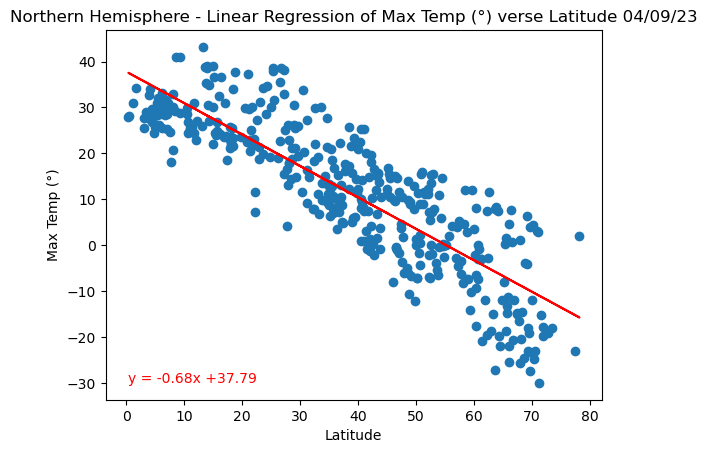

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°)", "Northern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig1.png")

plt.show()



 The rvalue is: 0.46835


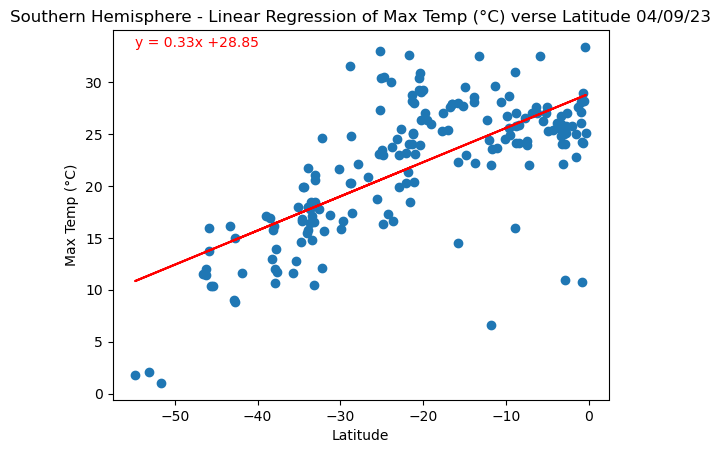

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (°C)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig2.png")

plt.show()

Discussion about the linear relationship (04/08/2023): For the northern hemisphere with is a good corralation as the r-values is 0.71 with southern hemisphere has an r-value of 0.55 doesn't show as much of corralation.  With the northern hemisphere plot the data points are much closer to the linear regression line.

### Humidity vs. Latitude Linear Regression Plot

 The rvalue is: 0.1046


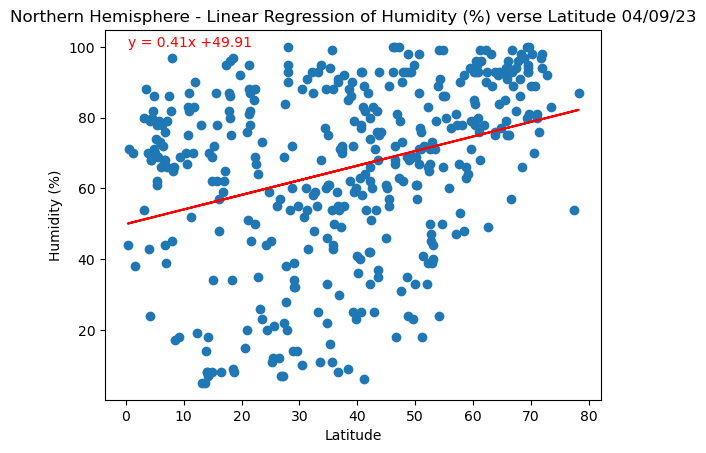

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig3.png")

plt.show()

 The rvalue is: 0.04853


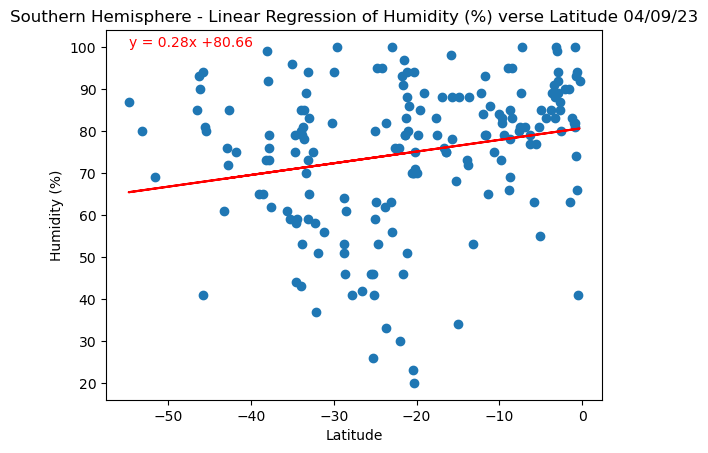

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig4.png")

plt.show()

Discussion about the linear relationship(04/09/2023): For the northern and southern Humidity there is not a good corration with the data both r-values are 0.105 and 0.049 respectively.  When viewing the plots you can see a wide spread of data points compared to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

 The rvalue is: 0.01827


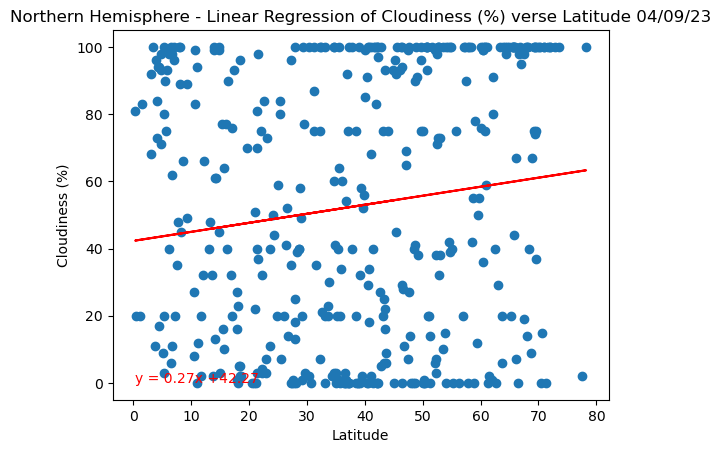

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig5.png")

plt.show()

 The rvalue is: 0.07061


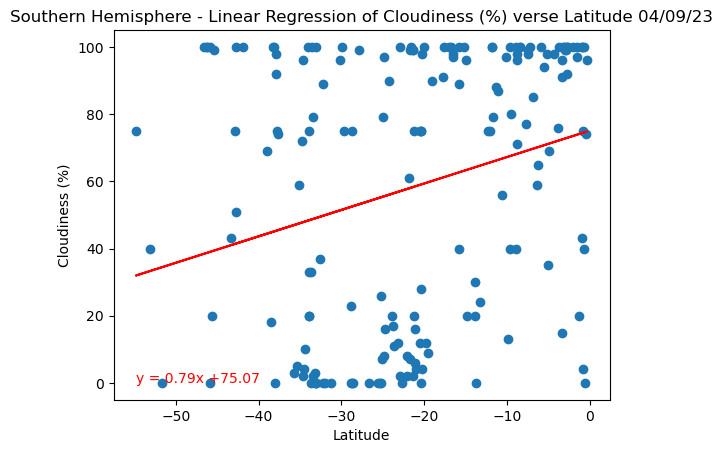

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern", (x_values.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig6.png")

plt.show()

Discussion about the linear relationship(04/09/2023): For both the northern and southern hemisphers verse the cloudiness doesn't have a strong correlation with the regression line as the r-values are 0.018 and 0.071 respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

 The rvalue is: 8e-05


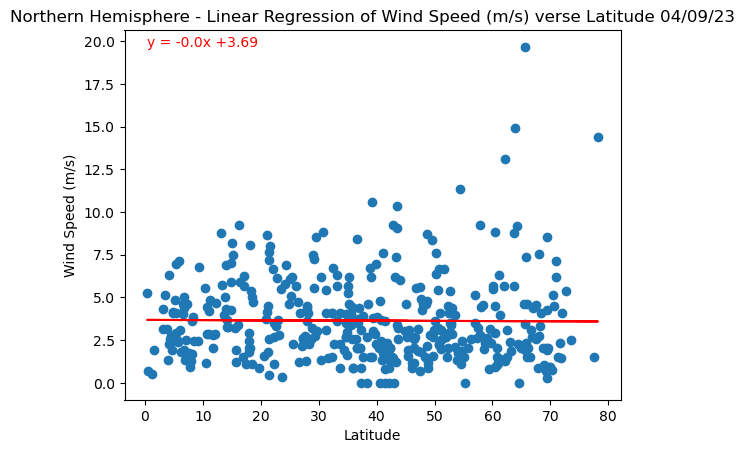

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Northern", (x_values.min(), y_values.max()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig7.png")

plt.show()

 The rvalue is: 0.07061


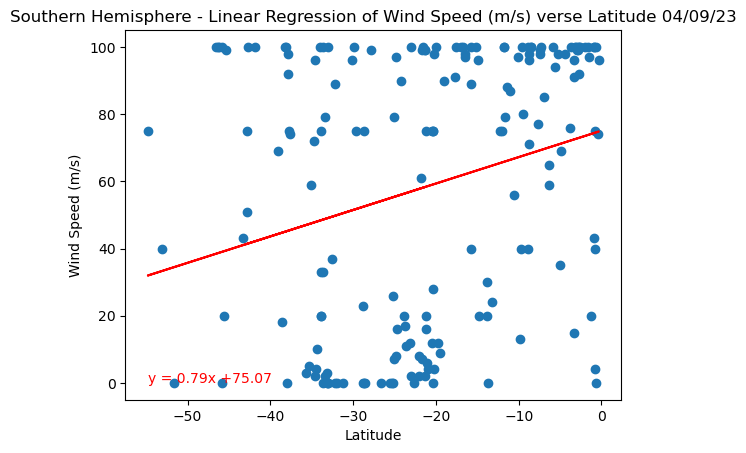

In [31]:
# Southern Hemisphere
x_vaules = southern_hemi_df["Lat"]
yvalues = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Southern", (x_vaules.min(), y_values.min()))

#save file to output_data/regression folder
plt.savefig("output_data/regression/fig8.png")

plt.show()

Discussion about the linear relationship(04/09/2023): The northern and southern hemispheres verse wind speed doesn't have a good correlation with the regression line with the r-value being 0.00008 and 0.071 respectively.